In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import os
# os.environ["QISKIT_IN_PARALLEL"] = 'TRUE'

In [3]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 16

from qiskit import QuantumCircuit, IBMQ, schedule
import qiskit.pulse as pulse
from qiskit.quantum_info.states import Statevector, DensityMatrix
from qiskit_dynamics import Solver, Signal
from qiskit_dynamics.pulse import InstructionToSignals
from qiskit.providers import BackendV2, QubitProperties
from qiskit.providers.options import Options
from qiskit.transpiler import Target

from qiskit.providers.models import PulseDefaults
from qiskit.qobj.pulse_qobj import PulseLibraryItem, PulseQobjInstruction
from qiskit.providers.models.pulsedefaults import Command

from qiskit_experiments.exceptions import QiskitError

In [98]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_manila")

ibmqfactory.load_account:WARNING:2022-11-30 13:46:29,651: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
from qiskit_experiments.test.pulse_backend import SingleTransmonTestBackend, ParallelTransmonTestBackend
pulse_backend = ParallelTransmonTestBackend(noise=False) 
pulse_backend1 = SingleTransmonTestBackend(noise=False)

### Works both with IQ+Discriminator [or] with Statevector.sample_counts() with collapse |2> into |1>

In [5]:
from qiskit_experiments.data_processing.discriminator import BaseDiscriminator

# class FakeDiscriminator(BaseDiscriminator):
#     """A fake discriminator class for testing."""

#     def predict(self, data):
#         """Discriminate the data"""
#         return ["0" if iq[0] > iq[1] else "1" for iq in data]

#     def config(self):
#         """Config method."""
#         return {}

#     def is_trained(self):
#         """This test discriminator is always trained."""
#         return True

# pulse_backend.discriminator = FakeDiscriminator()

In [6]:
import numpy as np

from qiskit_experiments.calibration_management.calibrations import Calibrations
from qiskit_experiments.calibration_management.basis_gate_library import (
    FixedFrequencyTransmon,
)
# from qiskit_experiments.test.pulse_backend import ParallelTransmonTestBackend, SingleTransmonTestBackend
# pulse_backend = ParallelTransmonTestBackend(noise=False)
# pulse_backend1 = SingleTransmonTestBackend(noise=False)
# qubit = 0
library = FixedFrequencyTransmon()
cals = Calibrations.from_backend(pulse_backend, libraries=[library])

In [7]:
from qiskit import transpile

In [39]:
# cals.add_parameter_value(320,'duration',(),schedule='x')

In [91]:
from qiskit.pulse import InstructionScheduleMap


In [92]:
inst_map = InstructionScheduleMap()
inst_map.add("szx", (0,1), sch)

In [105]:
from qiskit_experiments.library.characterization.fine_amplitude import FineZXAmplitude
from qiskit_experiments.framework import ExperimentData


In [107]:
exp = FineZXAmplitude(qubits=(0,1), backend=backend)
exp.set_transpile_options(inst_map=inst_map)
exp.transpile_options

Options(optimization_level=0, basis_gates=['szx'], inst_map=<qiskit.pulse.instruction_schedule_map.InstructionScheduleMap object at 0x7f35ec2c4dc0>)

In [110]:
data = ExperimentData(exp)
data.add_jobs(backend.retrieve_job("63864e64f41cc69a5696200f"))
exp.analysis.run(data)
data.analysis_results()

[AnalysisResult(name=@Parameters_FineAmplitudeAnalysis, value=<qiskit_experiments.curve_analysis.curve_data.CurveFitResult object at 0x7f3611ec75e0>, device_components=[<Qubit(Q0)>, <Qubit(Q1)>], experiment_id=9d1a9635-ff5c-4ac4-8f25-4b812a3c646d, result_id=4dfd2d1f-2bdc-412a-b3bb-5ba3e34d9664, chisq=None, quality=bad, verified=False, extra={}, tags=[], experiment id='9d1a9635-ff5c-4ac4-8f25-4b812a3c646d'),
 AnalysisResult(name=d_theta, value=0.00408456824065962+/-0.0009364739050997222, device_components=[<Qubit(Q0)>, <Qubit(Q1)>], experiment_id=9d1a9635-ff5c-4ac4-8f25-4b812a3c646d, result_id=9ae388f1-4617-4cfb-ba76-762c49361037, chisq=4.303120341959151, quality=bad, verified=False, extra={}, tags=[], experiment id='9d1a9635-ff5c-4ac4-8f25-4b812a3c646d')]

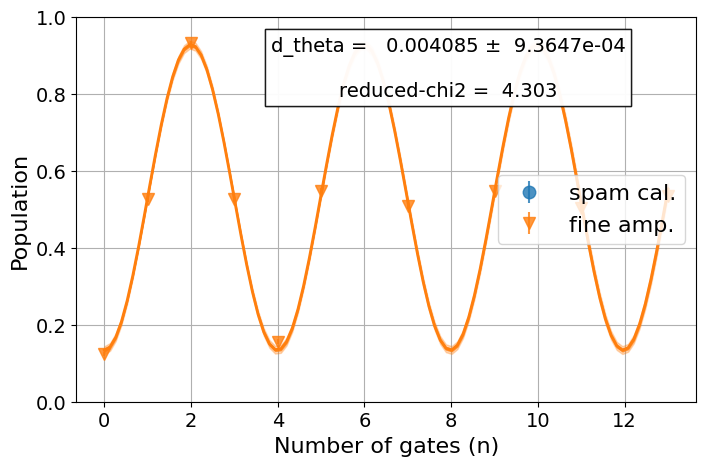

In [111]:
data.figure(0)

In [103]:
exp.circuits()[2].draw()

┌──────┐┌──────┐   
q_0: ┤0     ├┤0     ├───
     │  szx ││  szx │┌─┐
q_1: ┤1     ├┤1     ├┤M├
     └──────┘└──────┘└╥┘
  c: ═════════════════╩═

In [122]:
Statevector(np.kron(np.array([0,0,1]), np.array([1,0,0])), dims=[3,3]).probabilities_dict([0])

{'0': 1.0}

In [124]:
Statevector(np.kron(np.array([0,1]), np.array([1,0,0])), dims=[2,3]).probabilities_dict([1])

{'1': 1.0}

In [125]:
qubit_frequency, anharmonicity = 5, -0.25

qubit_frequency_02 = 2 * qubit_frequency + anharmonicity
ket0 = np.array([[1, 0, 0]]).T
ket1 = np.array([[0, 1, 0]]).T
ket2 = np.array([[0, 0, 1]]).T

sigma_m1 = ket0 @ ket1.T.conj()
sigma_m2 = ket1 @ ket2.T.conj()

sigma_p1 = sigma_m1.T.conj()
sigma_p2 = sigma_m2.T.conj()

p1 = ket1 @ ket1.T.conj()
p2 = ket2 @ ket2.T.conj()

ident = np.eye(3)

drift = 2 * np.pi * (qubit_frequency * p1 + qubit_frequency_02 * p2)
drift_2q = np.kron(drift, ident) + np.kron(ident, drift)


In [146]:
class joka:
    thresh = 0.25

In [148]:
joka().thresh

0.25

In [8]:
# exp.run()

In [11]:
from qiskit_experiments.library.calibration import RoughXSXAmplitudeCal
from qiskit_experiments.library.calibration.rough_frequency import RoughFrequencyCal


rabi0 = RoughXSXAmplitudeCal(
    0, cals, backend=pulse_backend, amplitudes=np.linspace(-0.1, 0.1, 55)
)

# rabi1 = RoughXSXAmplitudeCal(
#     1, cals, backend=pulse_backend, amplitudes=np.linspace(-0.1, 0.1, 55)
# )


freq01_estimate = pulse_backend.defaults().qubit_freq_est[0]
frequencies = np.linspace(freq01_estimate - 15e6, freq01_estimate + 15e6, 51)

spec1 = RoughFrequencyCal(
    1, cals, backend=pulse_backend,frequencies=frequencies)
spec1.set_experiment_options(amp=0.005)

In [10]:
from qiskit_experiments.framework.composite import ParallelExperiment

In [12]:
rabi_parallel = ParallelExperiment([rabi0, spec1],backend=pulse_backend)

In [15]:
# sb = list(list(rabi_parallel.circuits()[0].calibrations.values())[0].values())
# sb
rabi_parallel.circuits()[0].draw()

┌────────────┐    ░ ┌─┐   
 q_0: ────┤ Rabi(-0.1) ├────░─┤M├───
      ┌───┴────────────┴──┐ ░ └╥┘┌─┐
 q_1: ┤ Spec(-15000000.0) ├─░──╫─┤M├
      └───────────────────┘ ░  ║ └╥┘
c212: ═════════════════════════╩══╬═
                                  ║ 
c267: ════════════════════════════╩═

In [16]:
rabi_data = rabi_parallel.run(shots=4000, meas_level=2).block_for_results()

/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/composite/composite_experiment.py:168: UserWarning: Component 0 RoughXSXAmplitudeCal experiment run options ['meas_return'] values ['single'] will be overridden with ParallelExperiment values [None].
  warnings.warn(
/home/rupeshknn/projects/qc/pulse-backend-qamp22/qiskit-experiments/qiskit_experiments/framework/composite/composite_experiment.py:168: UserWarning: Component 1 RoughFrequencyCal experiment run options ['meas_return'] values ['avg'] will be overridden with ParallelExperiment values [None].
  warnings.warn(


Component experiment 0


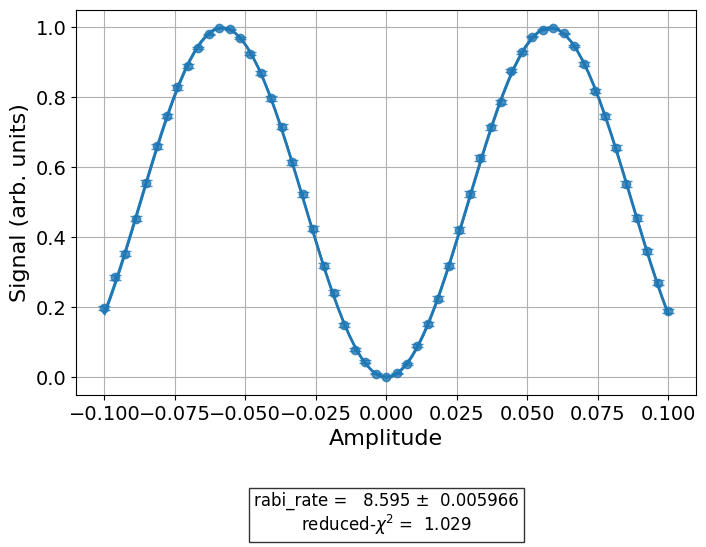

AnalysisResult
- name: @Parameters_OscillationAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_cos(x) = amp * cos(2 * pi * freq * x + phase) + base
 - success: True
 - number of function evals: 10
 - degree of freedom: 51
 - chi-square: 52.480938858175776
 - reduced chi-square: 1.029038016826976
 - Akaike info crit.: 5.4214266989262345
 - Bayesian info crit.: 13.45075943985612
 - init params:
  * amp = 0.5109722569357661
  * freq = 9.820047627230998
  * phase = 0.0
  * base = 0.5115971007248188
 - fit params:
  * amp = -0.4990200579934024 ± 0.00027120404037021584
  * freq = 8.595006902360463 ± 0.005965752584155513
  * phase = 0.0008201422750686299 ± 0.00220268783648735
  * base = 0.4998150729995312 ± 0.0002648924516893419
 - correlations:
  * (amp, base) = -0.08527454785502385
  * (amp, freq) = -0.05585915053687569
  * (freq, phase) = -0.008263990535174088
  * (amp, phase) = -0.0020478725089661566
  * (phase, base) = -0.001391819618460

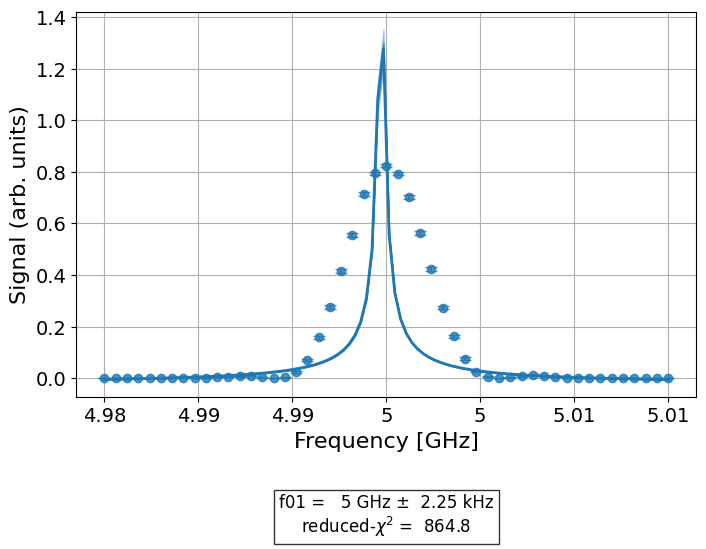

AnalysisResult
- name: @Parameters_ResonanceAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_lorentzian(x) = a * abs(kappa) / sqrt(kappa**2 + 4 * (x - freq)**2) + b
 - success: True
 - number of function evals: 26
 - degree of freedom: 47
 - chi-square: 40643.43233148726
 - reduced chi-square: 864.753879393346
 - Akaike info crit.: 348.71911204980336
 - Bayesian info crit.: 356.44641458070066
 - init params:
  * a = 0.8211712378027942
  * kappa = 6000000.0
  * freq = 5000000000.0
  * b = 0.0029977199577656587
 - fit params:
  * a = 1.6483379155134386 ± 0.060058837918704165
  * kappa = 320676.4261536179 ± 13526.714474276901
  * freq = 4999722942.230143 ± 2245.033957354742
  * b = -0.02206255209018456 ± 0.0001826401778186204
 - correlations:
  * (a, kappa) = -0.9919561086949702
  * (kappa, b) = -0.7512401638067248
  * (a, freq) = -0.32537066404032916
  * (freq, b) = -0.12909022290512484
  * (kappa, freq) = 0.30654624418330373
  * (a, b) 

In [17]:
for i, sub_data in enumerate(rabi_data.child_data()):
    print("Component experiment",i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)